In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [8]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0
399,15594041,0,49,36000,1


In [11]:
df['Age']

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

<Axes: >

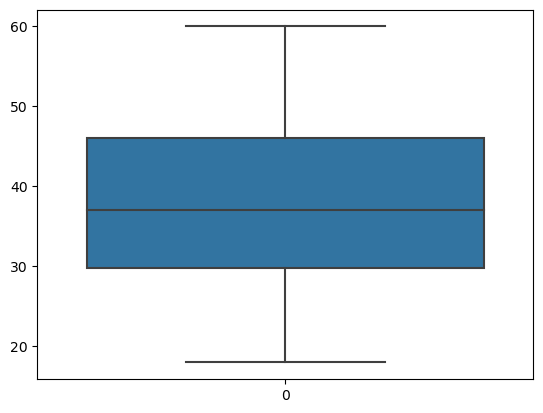

In [12]:
sns.boxplot(df['Age'])

In [13]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

<Axes: >

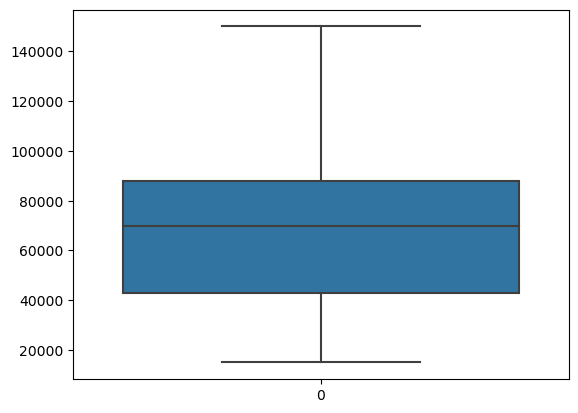

In [14]:
sns.boxplot(df['EstimatedSalary'])

<Axes: >

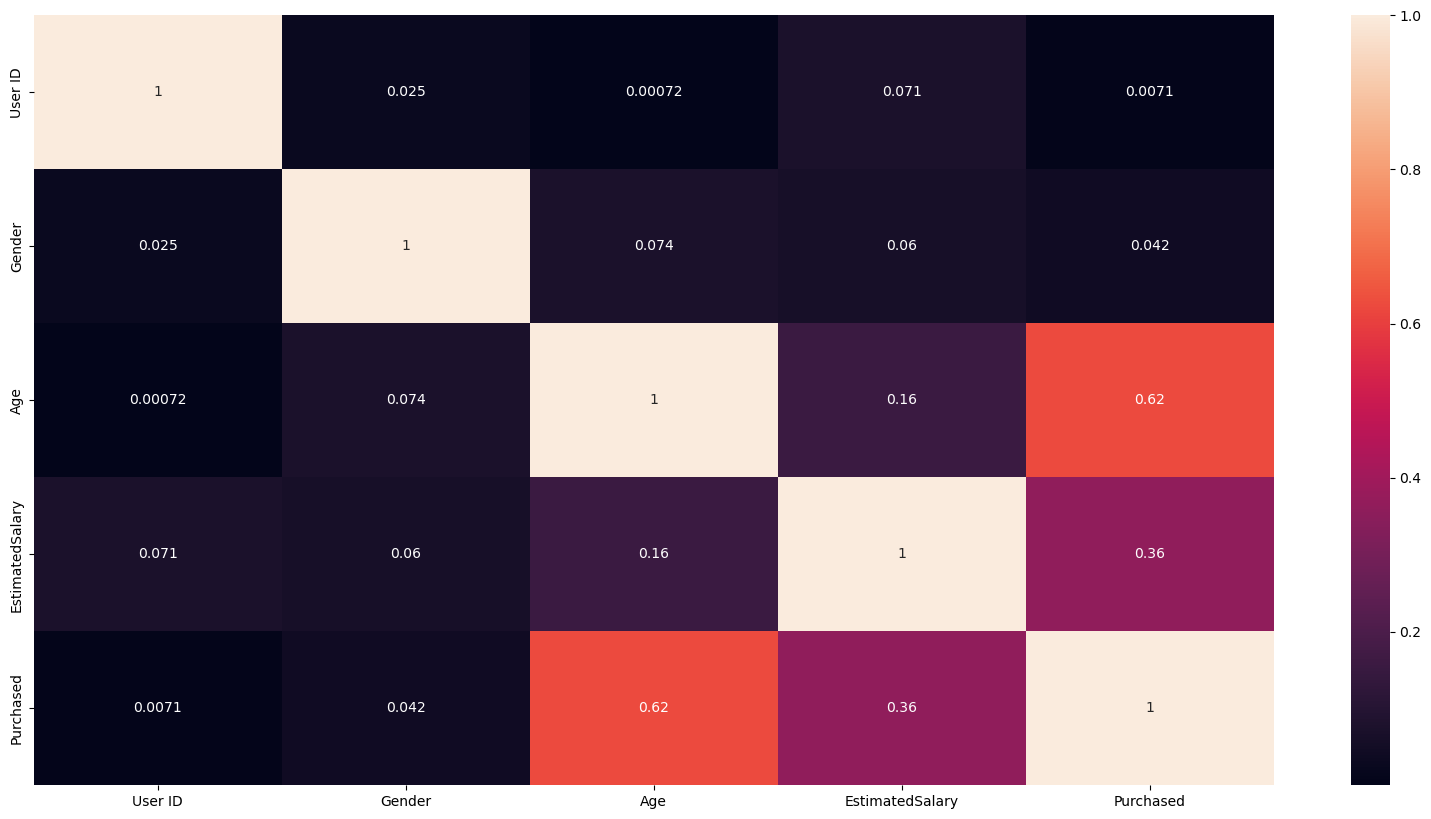

In [16]:
plt.figure(figsize=[20,10])
sns.heatmap(df.corr().abs(),annot=True)

<Axes: xlabel='Gender', ylabel='Count'>

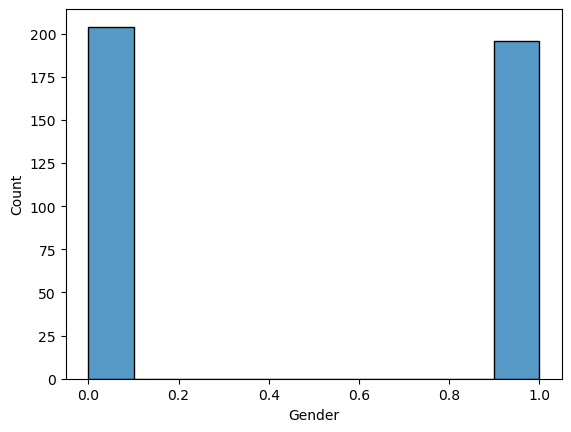

In [17]:
sns.histplot(x=df['Gender'])

<Axes: xlabel='Age', ylabel='Count'>

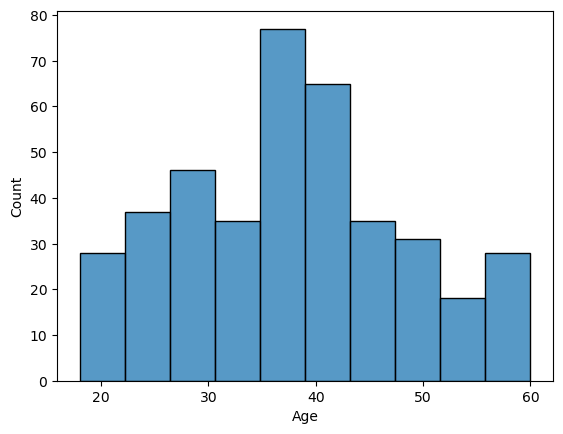

In [19]:
sns.histplot(x=df['Age'])

In [20]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

In [21]:
x=StandardScaler().fit_transform(x)

In [22]:
model=LogisticRegression()

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [26]:
model=LogisticRegression()

In [27]:
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
result=model.predict(x_test)

In [30]:
c=confusion_matrix(y_test,result)

<Axes: >

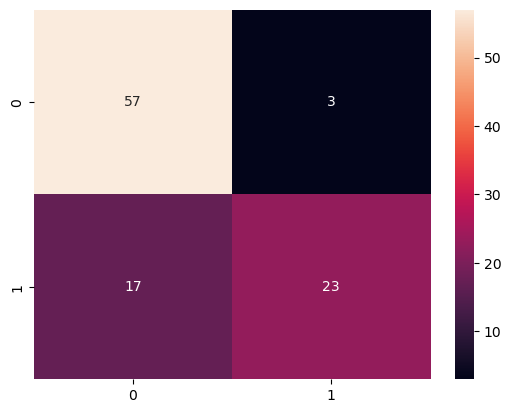

In [32]:
sns.heatmap(c,annot=True)

In [33]:
tn=c[0][0]
fn=c[0][0]
tp=c[1][0]
fp=c[1][1]

In [34]:
print(f"Accuracy score {(tp+tn)/(tp+tn+fp+fn)}")

Accuracy score 0.4805194805194805


In [35]:
print(f"Error rate : {(fp+fn)/(tp+tn+fp+fn)}")

Error rate : 0.5194805194805194


In [36]:
print(f"Precision : {(tp)/(tp+fp)}")

Precision : 0.425


In [37]:
print(f"Recall : {(tp)/(tp+fn)}")

Recall : 0.22972972972972974
